In [1]:
import torch 
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt
from VAN_new import *

In [2]:
def get_column(matrix, i):
    return torch.tensor([matrix[j][i] for j in range(len(matrix))])

In [3]:

def energie1D(spin): 
    spin_copie=spin.clone()
    spin_copie[spin_copie==0]=-1
    spin_copie_1 = torch.roll(spin_copie, -1)
    spin_copie_2 = torch.roll(spin_copie, 1)    
    energie=- torch.sum(spin_copie_1*spin_copie+spin_copie_2*spin_copie)
    return energie
    


In [4]:
def energie2D(lattice):
    energie = 0 
    for i in range(len(lattice)):
        energie+=energie1D(lattice[0])
    for j in range(len(lattice[0])):
        column = get_column(lattice, j)
        energie+=energie1D(column)
    return energie


    
energie2D(torch.tensor([[1, 1, 1], [1, 1, 1], [1, 1, 1]]))

tensor(-36)

In [5]:

def log_prob_energie(beta, energie):
    return -beta*energie


def log_prob_target_energie(spins, beta):
    
    log_probs = torch.ones(spins.shape[0]) * np.log(0.001)
    for i in range(len(log_probs)):
        racine=spins[i].shape[0]
        racine=(int(np.sqrt(racine)))
        lattice = spins[i].reshape(racine, racine)
        log_probs[i] = log_prob_energie(beta, energie2D(lattice))
    return log_probs 

In [6]:
beta_c=0.5*np.log(1+np.sqrt(2))
beta_c

0.44068679350977147

In [7]:
taille=64

Epoch 0: 15.543011665344238
Epoch 100: -4.0999603271484375
Epoch 200: -3.8878252506256104
Epoch 300: 2.7306909561157227
Epoch 400: 3.6495044231414795
Epoch 500: 1.669297456741333
Epoch 600: 1.6619900465011597
Epoch 700: 0.34104058146476746
Epoch 800: 1.637405514717102
Epoch 900: 0.6557400226593018


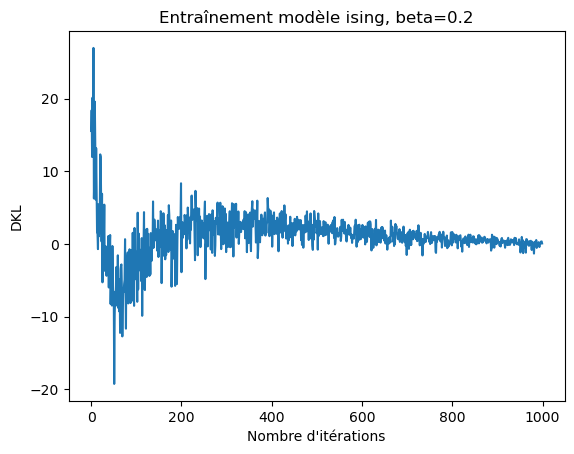

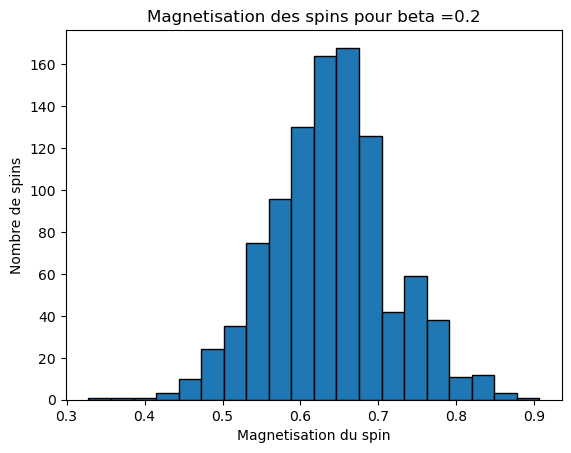

In [8]:
beta=0.2
mymodel1 = VAN(taille)
losses = train(mymodel1, lambda x:  log_prob_target_energie(x, beta), batch_size=100, n_iter=1000, lr=0.01)
plt.plot(losses)
plt.xlabel('Nombre d\'itérations')
plt.ylabel('DKL')
plt.title('Entraînement modèle ising, beta=' + str(beta))
plt.show()

mysample=mymodel1.sample(1000)
magnetisations=[]
for spin in mysample:
    magnetisations.append(torch.mean(spin))
plt.hist(magnetisations, bins=20, edgecolor='black') 
plt.xlabel('Magnetisation du spin')
plt.ylabel('Nombre de spins')
plt.title('Magnetisation des spins pour beta =' + str(beta))
plt.show()
    

Text(0.5, 1.0, 'Magnetisation des spins pour beta =0.1')

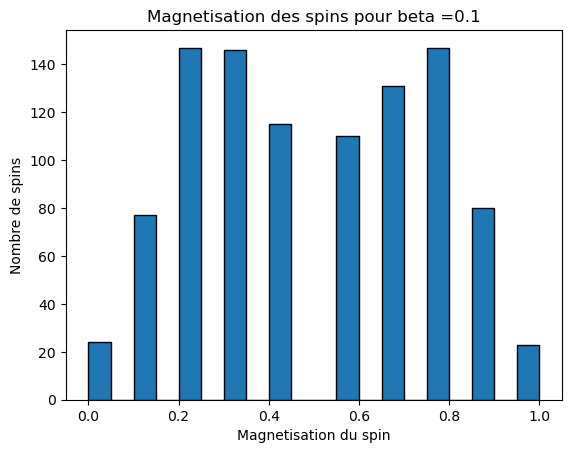

In [99]:
mysample=mymodel1.sample(1000)
magnetisations=[]
for spin in mysample:
    magnetisations.append(torch.mean(spin))
plt.hist(magnetisations, bins=20, edgecolor='black', align='mid')
plt.xlabel('Magnetisation du spin')
plt.ylabel('Nombre de spins')
plt.title('Magnetisation des spins pour beta =' + str(beta))